For tau = 1
Maximum range is  290.43614811718754  meters
Time of flight is  7.214774793414553  seconds


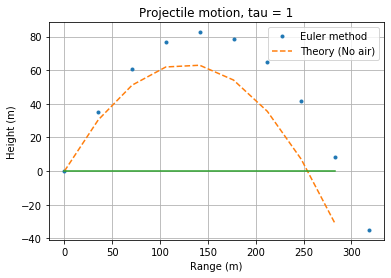

For tau = 0.5
Maximum range is  272.5779442792917  meters
Time of flight is  7.209668512071043  seconds


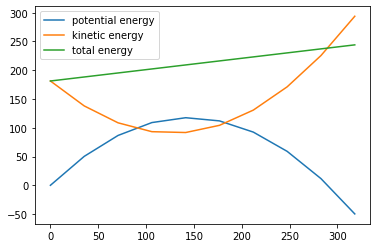

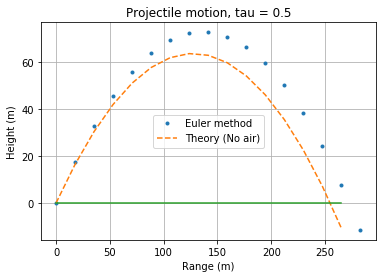

For tau = 0.1
Maximum range is  258.3776379138429  meters
Time of flight is  7.2080231950336255  seconds


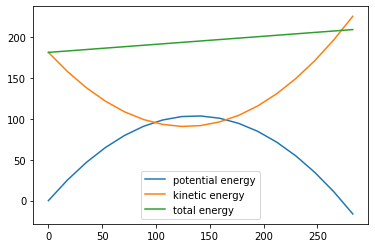

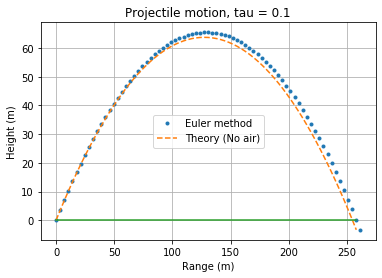

For tau = 0.05
Maximum range is  256.60979126759514  meters
Time of flight is  7.208020940967212  seconds


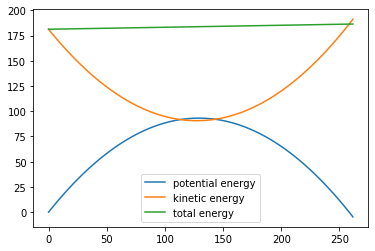

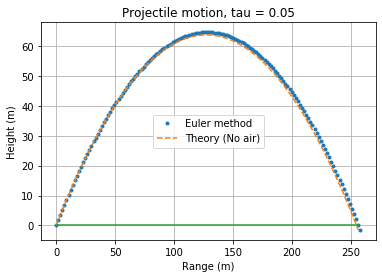

For tau = 0.01
Maximum range is  255.19555174215247  meters
Time of flight is  7.20802020662069  seconds


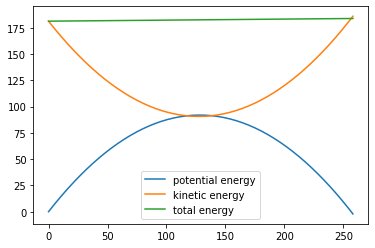

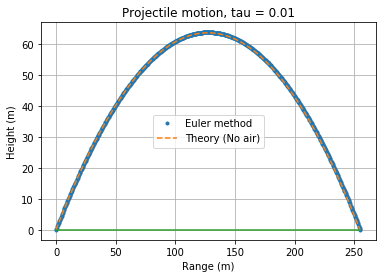

For tau = 0.005
Maximum range is  255.0187747218597  meters
Time of flight is  7.208020197428407  seconds


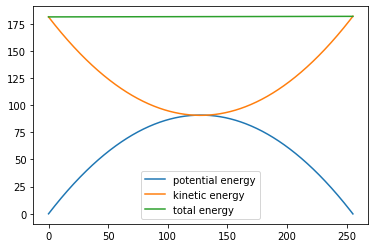

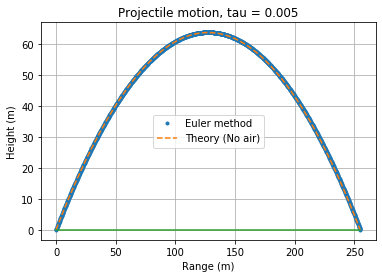

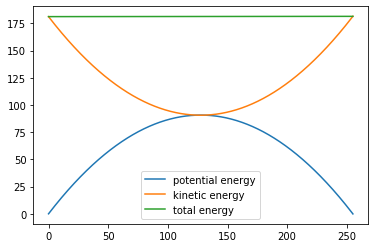

In [1]:
# python 3 version
import matplotlib.pyplot as plt
import numpy as np

from exD import interpf_mod # Import interpolation function from last assignment
# balle - Program to compute the trajectory of a baseball
#         using the Euler method.


def balle(tau = .1, get_input = False, calc_error = False, plot_energy = True, midpoint = False, airFlag = False):
    
    
    # Get input values from input prompts
    if get_input:
    #* Set initial position and velocity of the baseball  
        y1 = float(input("Enter initial height (meters): "))
        speed = float(input("Enter initial speed (m/s): "))
        theta = float(input("Enter initial angle (degrees): "))
        airFlag = bool(input("Air resistance? (Yes:1, No:0):"))
        tau = float(input("Enter timestep, tau (sec): "));  # (sec)
    else:
        # Set default initial conditions for experimenting with tau
        y1 = 0.0
        speed = 50.0
        theta = 45.0

        
        
    r1 = np.array([0.0, y1]);     # Initial vector position    
    v1 = np.array([[speed*np.cos(theta*np.pi/180)], [speed*np.sin(theta*np.pi/180)]])  # Initial velocity
    r = np.copy(r1)
    v = np.copy(v1)  # Set initial position and velocity, best to copy to avoid overwrites
    
    #* Set physical parameters (mass, Cd, etc.)
    Cd   = 0.35;    # Drag coefficient (dimensionless)
    area = 4.3e-3;  # Cross-sectional area of projectile (m^2)
    grav = 9.81;    # Gravitational acceleration (m/s^2)
    mass = 0.145;   # Mass of projectile (kg)
    
    
    if  not airFlag:
        rho = 0      # No air resistance
    else: 
        rho = 1.2    # Density of air (kg/m^3)
    
    air_const = -0.5*Cd*rho*area/mass;  # Air resistance constant
    
    #* Loop until ball hits ground or max steps completed
    maxstep = 10000;   # Maximum number of steps
    for istep in range(0,maxstep):
        #* Record position (computed and theoretical) for plotting
        t = (istep)*tau     # Current time
        if(istep ==0):
            xplot = np.array(r[0])   # Record trajectory for plot
            yplot = np.array(r[1])
            xNoAir = np.array(r[0])
            yNoAir = np.array(r[1])
            time = np.array(t)
            velocity = np.array(v)
        else:
            xplot = np.append(xplot,r[0,0])   # Record trajectory for plot
            yplot = np.append(yplot,r[0,1])
            xNoAir = np.append(xNoAir,r1[0] + v1[0]*t)   # Record trajectory for plot
            yNoAir = np.append(yNoAir,r1[1] + v1[1]*t - 0.5*grav*t**2)   
             
        #* Calculate the acceleration of the ball 
        accel = air_const*np.linalg.norm(v)*v   # Air resistance
        accel[1] = accel[1]-grav      # Gravity
    
        #* Calculate the new position and velocity using Euler method
        if not midpoint:
            r = r + (tau)*(v.T)                 # Euler step
            v = v + tau*accel
        else:
            v_new = v + tau*accel # Midpoint method
            r = r + (tau/2)*(v+v_new).T  #Midpoint method
            v = v_new #Midpoitn method
            
        time = np.append(time,t)
        velocity = np.concatenate((velocity,v),axis=1)
        #* If ball reaches ground (y<0), break out of the loop
        if( r[0,1] < 0 ):  
            xplot = np.append(xplot,r[0,0]);   # Record trajectory for plot
            yplot = np.append(yplot,r[0,1]);
            #time = np.append(time,t)
            break;                  # Break out of the for loop
    
    # Once the ball reaches the ground, interpolate the last 3 points to find accurate endpoints
    x_end = interpf_mod(0,yplot[-3:],xplot[-3:]) # Note use interpf
    t_end = interpf_mod(0,yplot[-3:],time[-3:])    
    
    # Print maximum range and time of flight
    print("For tau = %s" % tau)
    print('Maximum range is ',x_end,' meters');
    print('Time of flight is ',t_end,' seconds');
    
    # Graph the trajectory of the baseball
    plt.figure(0)
    # Mark the location of the ground by a straight line
    xground = np.array([0, np.max(xNoAir)]);  yground = np.array([0, 0]);
    # Plot the computed trajectory and parabolic, no-air curve
    plt.plot(xplot,yplot,'.')
    plt.plot(xNoAir,yNoAir,'--');
    plt.plot(xground,yground,'-');
    plt.legend(['Euler method','Theory (No air)']);
    plt.xlabel('Range (m)');  plt.ylabel('Height (m)');
    plt.title('Projectile motion, tau = %s' % tau);
    #axis equal; shg; # reset the aspect ratio, bring the plot to the front
    plt.grid(True)
    plt.show()
    
    if plot_energy:
        plt.figure(1)
        pot_e = yplot*grav*mass
        kin_e = .5*mass*(np.linalg.norm(velocity,axis=0)**2) 
        plt.plot(xplot,pot_e)
        plt.plot(xplot,kin_e)
        total_e = kin_e+pot_e
        plt.plot(xplot,total_e)
        plt.legend(['potential energy','kinetic energy','total energy'])
    
    
    return velocity
    


if __name__ == '__main__':
    for i in [1,.5,.1,.05,.01,.005]:
        v = balle(tau = i)